In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

# Data Exploration

In [8]:
X = pd.read_csv("data_Features.csv")
X.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0


In [30]:
X.describe()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,-10.190040,0.139648,0.626351,-0.858922,73.267808,18.789275,11.522362,1.328740,4.382248,5.191286
std,10.340583,5.013640,3.955417,1.446165,29.250724,47.703600,27.942124,3.393452,12.971518,13.406972
min,-32.019122,-13.846656,-12.316128,-1.692462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.877500,-3.610168,-2.079422,-1.689860,70.000000,0.123798,0.121437,0.000000,0.000000,0.000000
50%,-9.596479,-0.187084,0.912780,-1.689860,84.601769,0.481870,0.481870,0.000000,0.000000,0.000000
75%,0.167824,3.807440,3.483397,-0.297573,90.362319,4.080174,3.961181,0.004413,0.010148,0.000150
max,7.840619,14.640913,12.811255,6.054536,99.500682,479.722174,281.673389,23.241791,115.876574,88.054318


In [ ]:
y = pd.read_csv("data_Targets.csv")

In [31]:
X.dtypes

time       object
t2m       float64
u10       float64
v10       float64
SST       float64
SIC       float64
r1_MAR    float64
r2_MAR    float64
r3_MAR    float64
r4_MAR    float64
r5_MAR    float64
dtype: object

In [12]:
y.head()

,Unnamed: 0,Y1,Y3,Y4,Y5
0,2013-01-01,0,5,0,0
1,2013-01-02,0,0,0,0
2,2013-01-03,0,0,0,0
3,2013-01-04,0,2,0,0
4,2013-01-05,0,0,0,0


In [13]:
y.rename(columns={"Unnamed: 0" : "time"})

,time,Y1,Y3,Y4,Y5
0,2013-01-01,0,5,0,0
1,2013-01-02,0,0,0,0
2,2013-01-03,0,0,0,0
3,2013-01-04,0,2,0,0
4,2013-01-05,0,0,0,0
...,...,...,...,...,...
2551,2019-12-27,3,0,1,0
2552,2019-12-28,0,0,0,0
2553,2019-12-29,0,0,0,0
2554,2019-12-30,0,0,1,0


In [14]:
y = y["Y1"]

In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2551    3
2552    0
2553    0
2554    0
2555    0
Name: Y1, Length: 2556, dtype: int64

In [19]:
print(set(y.values))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 65, 71, 72, 73, 79, 81, 84, 85, 87, 92, 94, 95, 96, 98, 100, 103, 109, 112, 113, 114, 119, 123, 126, 132, 135, 139, 168, 186, 227, 245, 256, 433}


<Axes: >

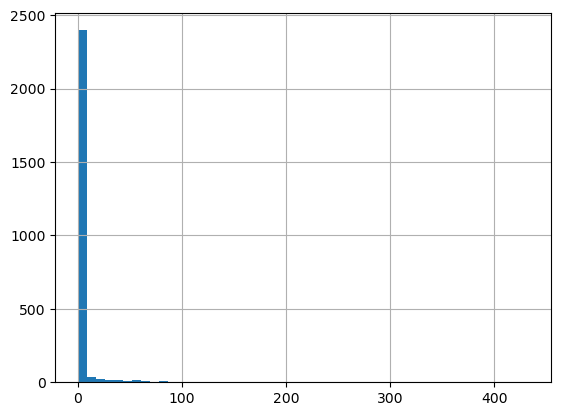

In [23]:
y.hist(bins=50)

In [25]:
y.describe()

count    2556.000000
mean        3.525430
std        18.977537
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       433.000000
Name: Y1, dtype: float64

In [32]:
y_bin = (y >= y.mean()).astype(int)

In [33]:
y_bin

0       0
1       0
2       0
3       0
4       0
       ..
2551    0
2552    0
2553    0
2554    0
2555    0
Name: Y1, Length: 2556, dtype: int64

In [34]:
X = X.drop(columns="time")

In [35]:
X

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2551,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0
2552,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0
2553,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0
2554,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0


In [36]:
X.dtypes

t2m       float64
u10       float64
v10       float64
SST       float64
SIC       float64
r1_MAR    float64
r2_MAR    float64
r3_MAR    float64
r4_MAR    float64
r5_MAR    float64
dtype: object

In [47]:
X.shape

(2556, 10)

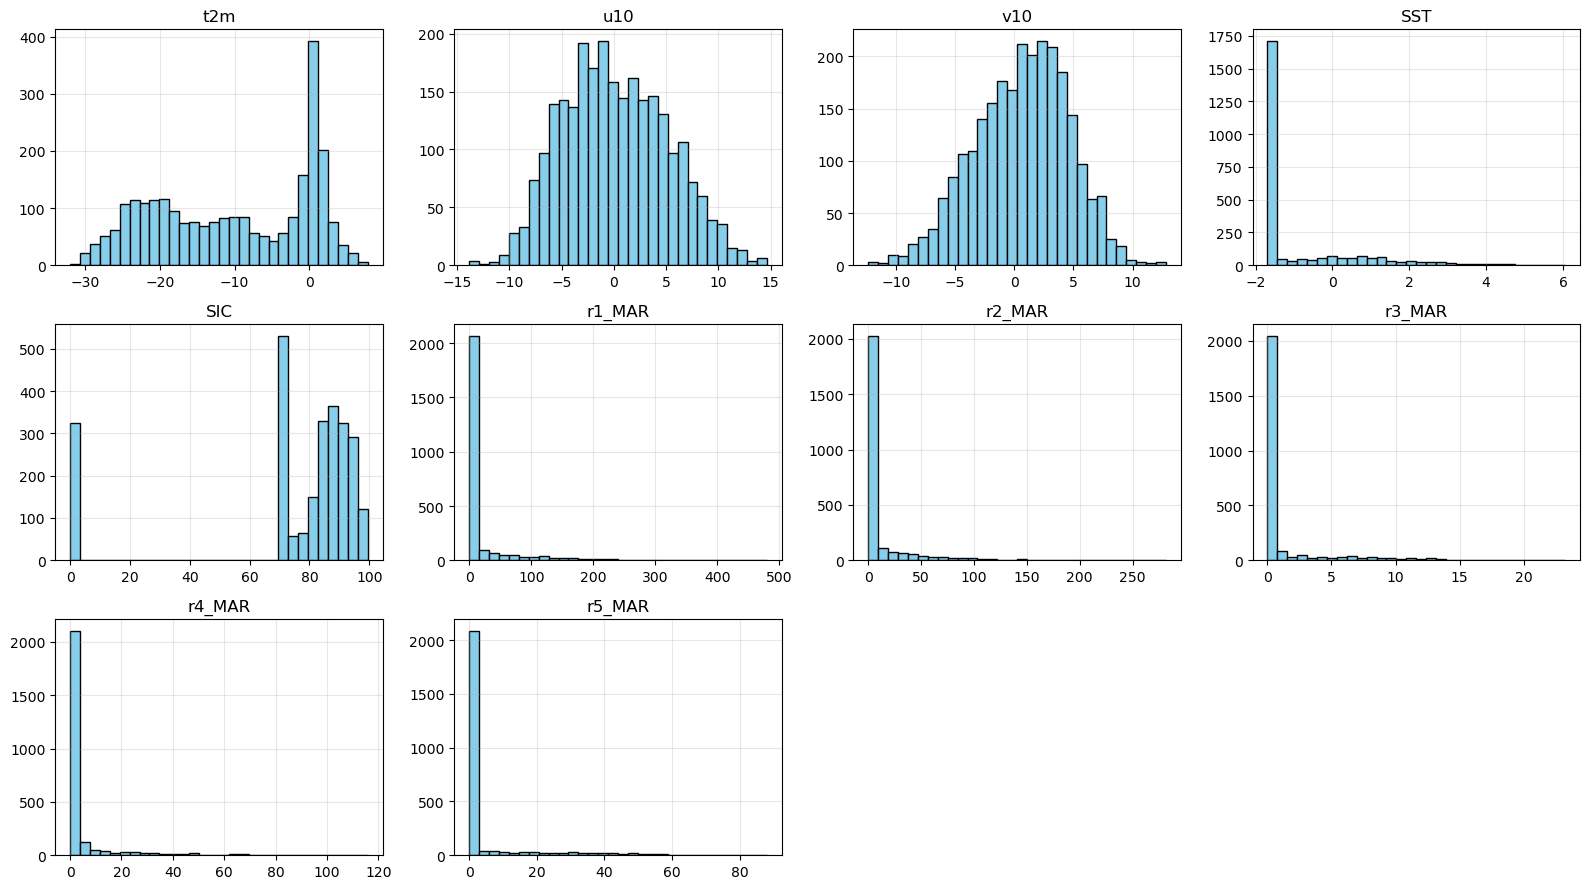

In [ ]:
n_features = X.shape[1]
n_cols = 4  
n_rows = int(np.ceil(n_features / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows))

axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].hist(X[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].grid(alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Test of different models

## Naive Bayes

### 1st try

In [51]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X,y_bin,test_size=0.2,random_state=42)

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [53]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.955078125
0.6274509803921569
0.8888888888888888
0.735632183908046


### Cross Validation

In [55]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(model, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [56]:
cv_results

{'fit_time': array([0.00394487, 0.00101399, 0.00076103, 0.00074387, 0.0006671 ]),
 'score_time': array([0.00873017, 0.00440812, 0.0043211 , 0.00354886, 0.00382781]),
 'test_accuracy': array([0.95507812, 0.95890411, 0.97260274, 0.89823875, 0.94324853]),
 'train_accuracy': array([0.94520548, 0.9393643 , 0.9393643 , 0.95452323, 0.94425428]),
 'test_auc': array([0.87338529, 0.97530769, 0.97611111, 0.87309572, 0.9556025 ]),
 'train_auc': array([0.96120796, 0.93894148, 0.94454545, 0.95830575, 0.94976212]),
 'test_f1': array([0.5106383 , 0.8742515 , 0.83333333, 0.2972973 , 0.78195489]),
 'train_f1': array([0.75111111, 0.6374269 , 0.70334928, 0.7881549 , 0.69354839]),
 'test_precision': array([0.42857143, 0.78494624, 0.72916667, 0.18333333, 0.69333333]),
 'train_precision': array([0.63059701, 0.50697674, 0.58102767, 0.68650794, 0.56331878]),
 'test_recall': array([0.63157895, 0.98648649, 0.97222222, 0.78571429, 0.89655172]),
 'train_recall': array([0.92857143, 0.85826772, 0.89090909, 0.9251336

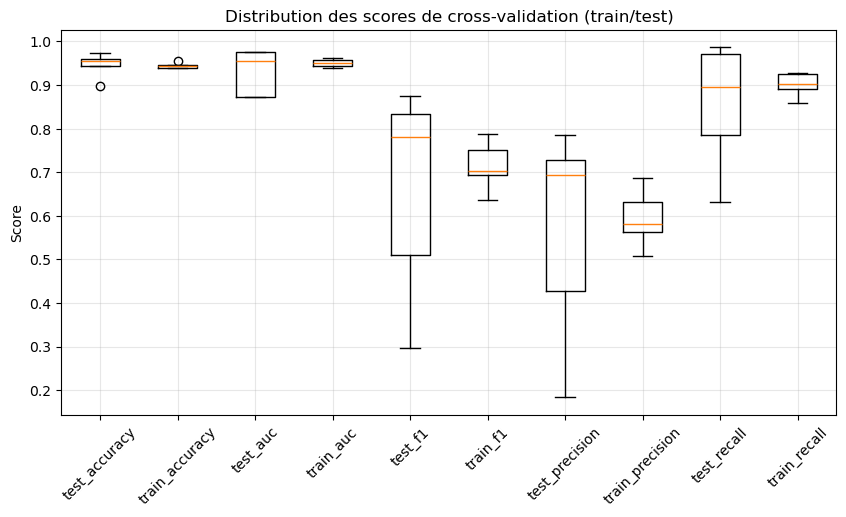

In [57]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### Normalization of the data

In [60]:
model = make_pipeline(StandardScaler(), GaussianNB())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [61]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.955078125
0.6274509803921569
0.8888888888888888
0.735632183908046


### Metrics : Confusion Matrix, ROC Indicator and AUC curb

In [64]:
confusion_matrix(y_test,y_pred)

array([[457,  19],
       [  4,  32]])

In [67]:
y_score = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_bin, y_score)
auc(fpr,tpr)

0.951726505476862

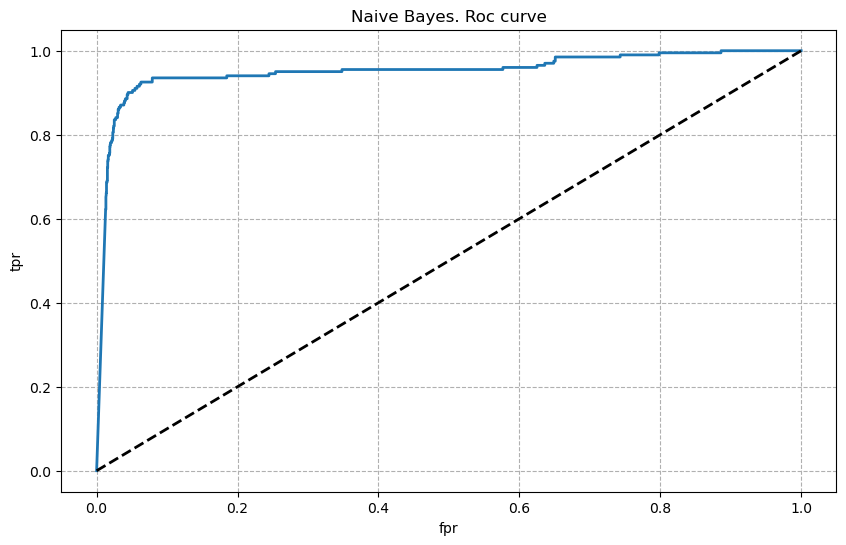

In [68]:
y_proba= model.predict_proba(X)[:,1];
fpr, tpr, thresholds= roc_curve(y_bin, y_proba);
figure= plt.figure(figsize=(10,6));
plt.plot(fpr,tpr, linewidth= 2);
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Linear Discriminant Analysis

### 1st attempt

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y_bin,test_size=0.2,random_state=42)

lda = LinearDiscriminantAnalysis(n_components=1, store_covariance=True)

lda.fit(X_train,y_train)
y_pred_train = lda.predict(X_train)
y_pred = lda.predict(X_test)

In [71]:
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train, average='weighted')
rec = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy: 0.972
Precision: 0.971
Recall: 0.972
F1-score: 0.971

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1879
           1       0.83      0.81      0.82       165

    accuracy                           0.97      2044
   macro avg       0.91      0.90      0.90      2044
weighted avg       0.97      0.97      0.97      2044



In [72]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.971
Precision: 0.973
Recall: 0.971
F1-score: 0.972

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       476
           1       0.76      0.86      0.81        36

    accuracy                           0.97       512
   macro avg       0.87      0.92      0.89       512
weighted avg       0.97      0.97      0.97       512



### Cross Validation

In [76]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(lda, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [77]:
cv_results

{'fit_time': array([0.01131129, 0.00389624, 0.00170588, 0.00193   , 0.00174403]),
 'score_time': array([0.01973987, 0.00486279, 0.00336289, 0.00358105, 0.0042491 ]),
 'test_accuracy': array([0.95898438, 0.95890411, 0.98043053, 0.95694716, 0.97260274]),
 'train_accuracy': array([0.9721135 , 0.97066015, 0.96772616, 0.97359413, 0.96919315]),
 'test_auc': array([0.728515  , 0.98759973, 0.97140351, 0.89192297, 0.95231027]),
 'train_auc': array([0.96990711, 0.94115836, 0.94280787, 0.96084284, 0.95376968]),
 'test_f1': array([0.4       , 0.84671533, 0.86111111, 0.42105263, 0.87719298]),
 'train_f1': array([0.84297521, 0.76190476, 0.79878049, 0.85326087, 0.78498294]),
 'test_precision': array([0.4375    , 0.92063492, 0.86111111, 0.33333333, 0.89285714]),
 'train_precision': array([0.84530387, 0.768     , 0.80368098, 0.86740331, 0.76666667]),
 'test_recall': array([0.36842105, 0.78378378, 0.86111111, 0.57142857, 0.86206897]),
 'train_recall': array([0.84065934, 0.75590551, 0.79393939, 0.8395721

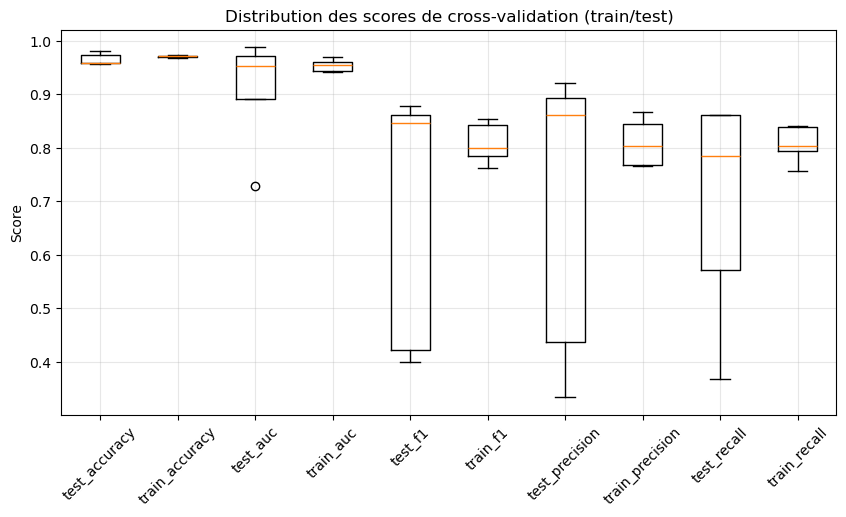

In [78]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### AUC Curb

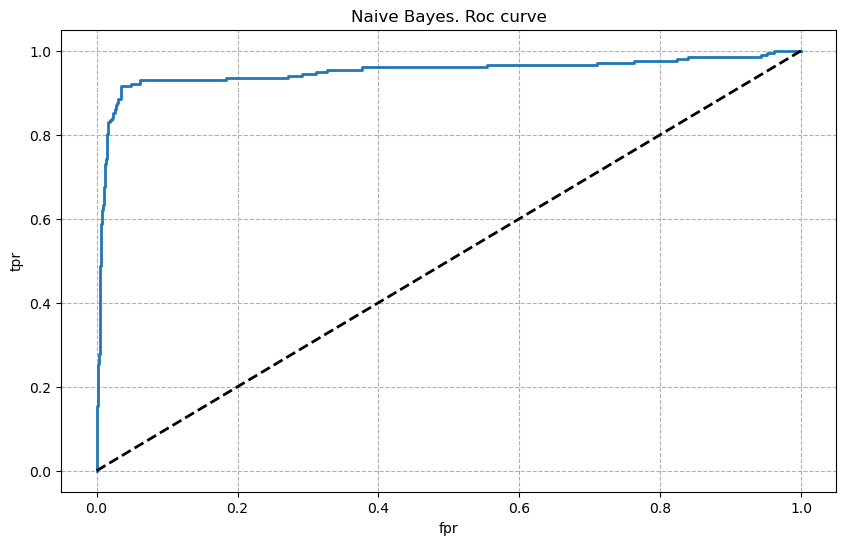

In [79]:
y_proba= lda.predict_proba(X)[:,1];
fpr, tpr, thresholds= roc_curve(y_bin, y_proba);
figure= plt.figure(figsize=(10,6));
plt.plot(fpr,tpr, linewidth= 2);
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Quadratic Discriminant Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.2, random_state=42)